<a href="https://colab.research.google.com/github/GM223/PKrs_currency/blob/master/PKRS_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pakistani Rupee Currency Classification using Deeplearning

This notebook will download the Pakistani Rupee dataset that i created from my github and then use the [fast.ai](https://github.com/fastai/fastai) Deep  [Learning](https://en.wikipedia.org/wiki/Deep_learning) library to classify the currency.

This code is based on code from a fast.ai MOOC that will be publicly available in Jan 2019

### Installing necesary pakages to run the notebook on google colab

Installing the necessary pakages to run the Fast.ai V1 library on goolge colab, run this every time the notebook is restarted.

In [0]:
!curl https://course-v3.fast.ai/setup/colab | bash

### How was the dataset created?
# PKrs_currency
Pakistani currency classification using deep learning. 

I wanted to see how accurate a Neural Network would be at categorising images of currency. Being a resident of Pakistan i wanted to train it on the [Pakistnai Rupee](https://en.wikipedia.org/wiki/Pakistani_rupee)  but a quick google search discovered that there were very little camera images of the different Pakistani notes on the internet so i created the dataset myself.

The different bank notes in the dataset are as following : 

I took the 6 images below from [this](http://www.mkhalid.com/2008/04/27/pakistani-rupee-currency-note/) blog post, images in the dataset are my own.
<p float="left">
  <img src="http://www.mkhalid.com/wp-content/uploads/2008/04/10rupees2005jinnahpesha.jpg" width="300" />
  <img src="http://www.mkhalid.com/wp-content/uploads/2008/04/20rupees2008muhammad_ali_jinnahmohen-jo-daro_larkana.jpg" width="300" /> 
  <img src="http://www.mkhalid.com/wp-content/uploads/2008/04/PKR-50-note-300x300-july-9-2008.jpg" width="300" />
   <img src="http://www.mkhalid.com/wp-content/uploads/2008/04/100rupees2005muhammad_al.jpg" width="300" />
   <img src="http://www.mkhalid.com/wp-content/uploads/2008/04/500rupee2007muhammad_alibashahi_masjid_lahore.jpg" width="300" />
   <img src="http://www.mkhalid.com/wp-content/uploads/2008/04/1000rupeesjinnahislamia_college_peshawar.jpg" width="300" />
</p>

### Creation of Dataset
The first step was to find as many currency notes as i could, everyone in the family lent me their riches for science!
 
 <p float="left">
 <img src="https://github.com/GM223/PKrs_currency/blob/master/others/InkedIMG_20181023_161942_LI_pile.jpg?raw=true" width="700" />
</p>

I then took pictures of all the notes and divided them in train and validation set, the distribution of the dataset is as following :

| Category | Train | Valid | Total |
|:------------:|:-----:|:-----:|-------|
| ten | 101 | 44 | 145 |
| twenty | 12 | 6 | 20 |
| fifty | 15 | 7 | 22 |
| hundred | 14 | 6 | 20 |
| five_hundred | 2 | 2 | 4 |
| Thousand | 5 | 3 | 8 |
| **TOTAL** | **149** | **68** | **217** |
| **Percentage** | *68.7%* | *31.3%* | *100%* |

The data was distributed into a dataset directory structure as shown below:

![alt text](https://github.com/GM223/PKrs_currency/blob/master/others/direct_struct.PNG?raw=true)

### Download Dataset
Clone the Pakistani Rupees Dataset from my github respitory

In [2]:
!git clone https://github.com/GM223/PKrs_currency.git

Cloning into 'PKrs_currency'...
remote: Enumerating objects: 261, done.
remote: Counting objects: 100% (261/261), done.
remote: Compressing objects: 100% (248/248), done.
remote: Total 261 (delta 14), reused 260 (delta 13), pack-reused 0
Receiving objects: 100% (261/261), 195.65 MiB | 14.75 MiB/s, done.
Resolving deltas: 100% (14/14), done.


Look at the dataset directory structure , copied comand from [here](https://stackoverflow.com/questions/3455625/linux-command-to-print-directory-structure-in-the-form-of-a-tree)

In [17]:
!ls -R | grep "PKrs_currency/Pkrs_currency_dataset_train_valid" | sed -e 's/:$//' -e 's/[^-][^\/]*\//--/g' -e 's/^/   /' -e 's/-/|/'

   |---Pkrs_currency_dataset_train_valid
   |-----train
   |-------fifty
   |-------five_hundred
   |-------hundred
   |-------ten
   |-------thousand
   |-------twenty
   |-----valid
   |-------fifty
   |-------five_hundred
   |-------hundred
   |-------ten
   |-------thousand
   |-------twenty


### Import Libraries

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
# To ensure that all the random numbers generated seed from the same number every time the code is run, this is used for result reproductability.
np.random.seed(2)

### Load Data

In [28]:
path = "PKrs_currency/Pkrs_currency_dataset_train_valid"
!ls "PKrs_currency/Pkrs_currency_dataset_train_valid"

train  valid


In [29]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

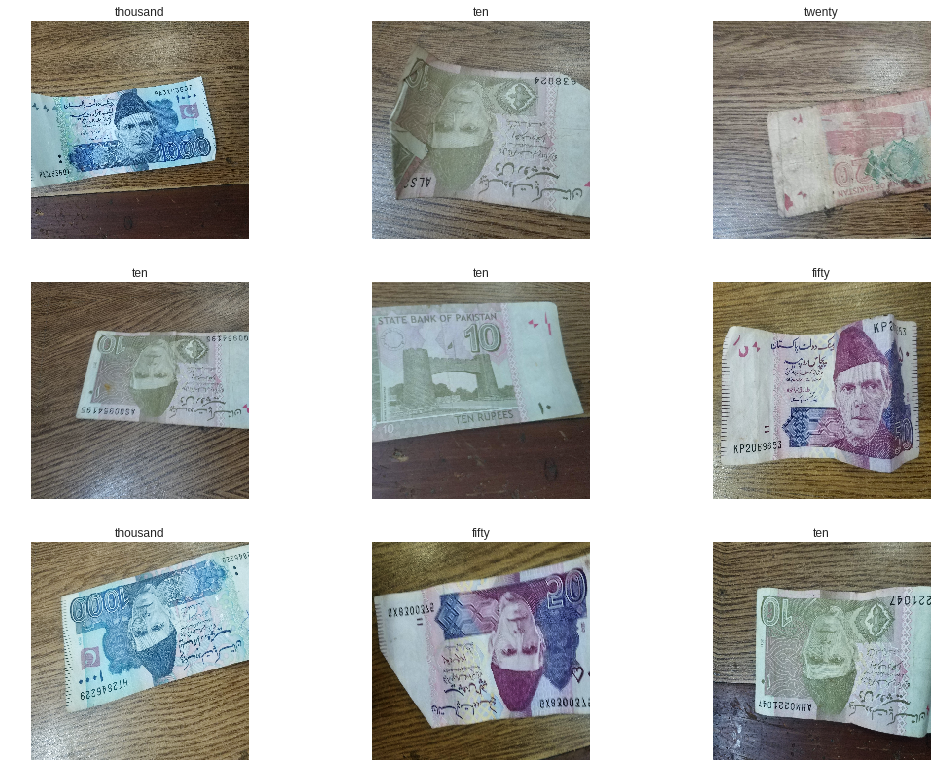

In [30]:
data.show_batch(rows=3, figsize=(15,11))

In [31]:
print(data.classes)
len(data.classes),data.c

['fifty', 'five_hundred', 'hundred', 'ten', 'thousand', 'twenty']


(6, 6)

### Train the final layer only

In [32]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 49537156.04it/s]


In [33]:
learn.fit_one_cycle(12)

Total time: 16:54
epoch  train_loss  valid_loss  accuracy
1      2.269900    1.416952    0.602941  (01:25)
2      2.100285    1.175842    0.632353  (01:24)
3      1.774789    0.802296    0.838235  (01:23)
4      1.499064    0.462203    0.926471  (01:24)
5      1.276974    0.274702    0.941176  (01:24)
6      1.084717    0.180558    0.985294  (01:24)
7      0.945425    0.140718    0.985294  (01:23)
8      0.825040    0.116224    0.985294  (01:24)
9      0.726614    0.102647    0.985294  (01:25)
10     0.647413    0.095166    0.985294  (01:24)
11     0.593585    0.092080    0.985294  (01:23)
12     0.537479    0.093750    0.985294  (01:25)



In [0]:
learn.save('stage-1')

### Results after only training final layer

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

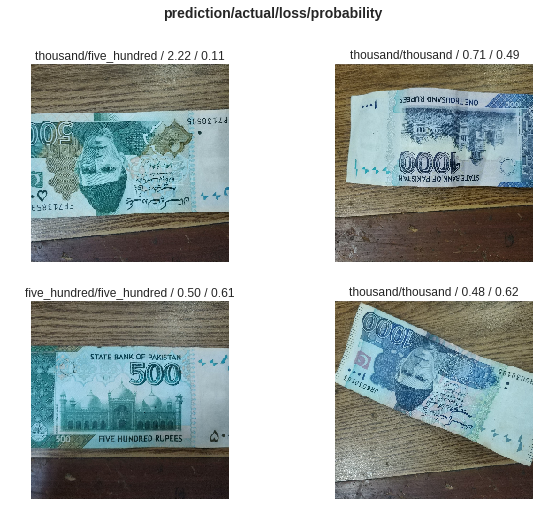

In [46]:
interp.plot_top_losses(4, figsize=(10,8))

**^Only the first image is incorrectly classified** as can be seen by the labels of the image, other wise all predictions are correct.

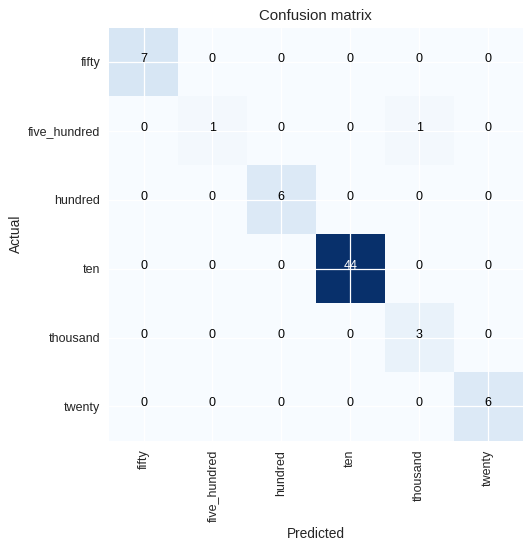

In [47]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=90)

In [48]:
interp.most_confused(min_val=0)

[('five_hundred', 'thousand', 1)]

Only the final layer of the model was trained and the model was able to achieve an accuracy of **98.5 %** . Only one image was incorrectly classified.

The fact that we provided such a small number of images and the model was able to achive this level of accuracy is an amazing testament to the power and effectiveness of deep learning.

We will now try to train the entire model and see if we can achieve a 100% accuracy.

### Find Learning Rate

In [50]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


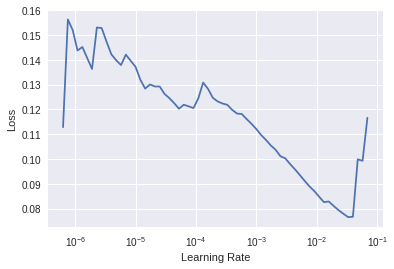

In [51]:
learn.recorder.plot()

From the graph above we can set the learning rate to `(1e-5, 1e-2)`

### Fine Tune the model

In [55]:
learn.unfreeze()
learn.fit_one_cycle(20, max_lr=slice(1e-5,1e-2))

Total time: 28:11
epoch  train_loss  valid_loss  accuracy
1      0.013121    0.114484    0.985294  (01:24)
2      0.016249    0.083947    0.985294  (01:23)
3      0.010656    0.085689    0.970588  (01:24)
4      0.008479    0.125269    0.970588  (01:25)
5      0.008775    0.139849    0.955882  (01:24)
6      0.010784    0.226414    0.970588  (01:24)
7      0.048071    0.406404    0.911765  (01:24)
8      0.059499    3.628040    0.647059  (01:24)
9      0.087371    3.687485    0.558824  (01:25)
10     0.087282    1.757463    0.794118  (01:23)
11     0.091785    2.874215    0.676471  (01:24)
12     0.093991    3.704077    0.632353  (01:24)
13     0.084780    3.092623    0.632353  (01:23)
14     0.100848    1.219518    0.823529  (01:25)
15     0.099841    0.254832    0.941176  (01:24)
16     0.100751    0.095559    0.985294  (01:24)
17     0.103730    0.077576    0.985294  (01:23)
18     0.107689    0.086372    0.970588  (01:24)
19     0.110936    0.098872    0.970588  (01:25)
20     0.10

In [0]:
learn.save("Stage-2")

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

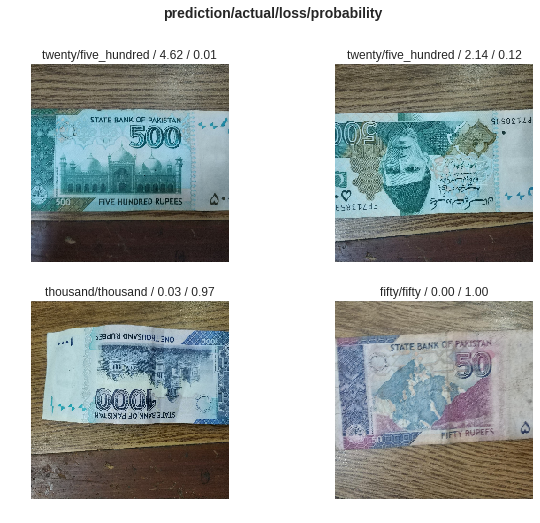

In [58]:
interp.plot_top_losses(4, figsize=(10,8))

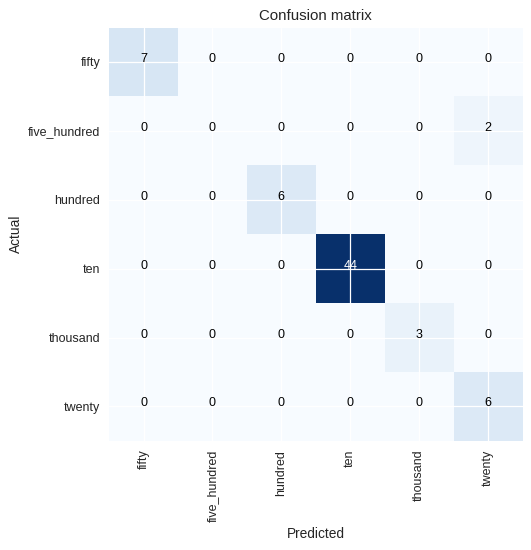

In [59]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=90)

In [60]:
interp.most_confused(min_val=0)

[('five_hundred', 'twenty', 2)]

### Conclusion
The model achieved an accuracy of **98.5%** with only training the final layer but after unfreezing the rest of the layer and trying to get it to a 100% was achieved, I think if a smaller model say *resnet18*  used and is left to train for quite a few epochs it may be able to get to that 100% mark.

The dataset is also quite small and both the error's that occur after the training of the full network are on images of "five_hundred" rupee note, there are only 4 images of five_hundred in the dataset out of wihich only 2 were used for training, this is probably too little data for the network to learn to classify the 'five_hundred" note.